In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [3]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target = 'Diabetic'
X,y = diabetes[features], diabetes[target]

In [4]:
# podział danych
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)

In [5]:
# standaryzacja
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train) ## dlaczego tutaj robimy fit_transform?
X_test_standardized = scaler_2var.transform(X_test)  ## dlaczego tutaj robimy transform?

In [6]:
# model bez regularyzacji
model_lr_none= LogisticRegression(penalty='none')
model_lr_none.fit(X_train_standardized, y_train)
lr_none_predictions = model_lr_none.predict(X_test_standardized)
print('F1_score: ', f1_score(y_test,lr_none_predictions))

F1_score:  0.5809280233832663


In [7]:
# model z reguylaryzacją L1
model_lr_l1= LogisticRegression(penalty='l1',solver='saga')
model_lr_l1.fit(X_train_standardized, y_train)
lr_l1_predictions = model_lr_l1.predict(X_test_standardized)
print('F1_score: ', f1_score(y_test,lr_l1_predictions))

F1_score:  0.5809280233832663


In [8]:
# model z regularyzacją L2
model_lr_l2= LogisticRegression()
model_lr_l2.fit(X_train_standardized, y_train)
lr_l2_predictions = model_lr_l2.predict(X_test_standardized)
print('F1_score: ', f1_score(y_test, lr_l2_predictions))

F1_score:  0.5809280233832663


In [9]:
# model z regulazryzacją ElasticNet
model_lr_en= LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5)
model_lr_en.fit(X_train_standardized, y_train)
lr_en_predictions = model_lr_en.predict(X_test_standardized)
print('F1_score: ', f1_score(y_test, lr_en_predictions))

F1_score:  0.5809280233832663


In [10]:
# funkcja plot_classification_surface

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(6, 3))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()



Logistic Regression bez regularyzacji


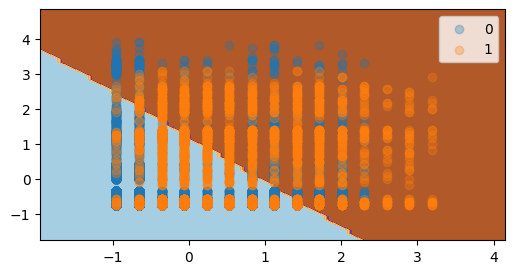

Logistic Regression z regularyzacją L1


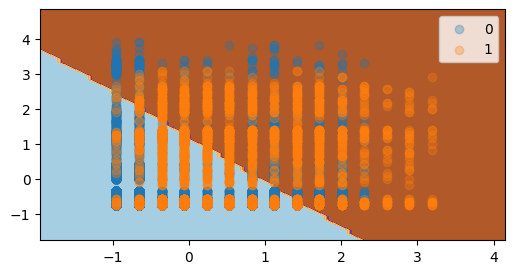

Logistic Regression z regularyzacją L2


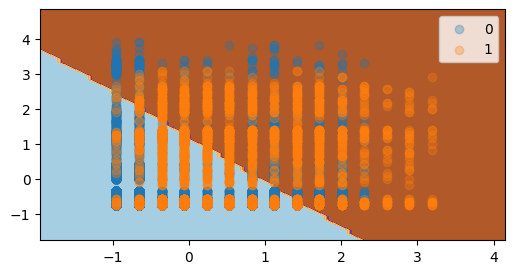

Logistic Regression z regularyzacją ElasticNet


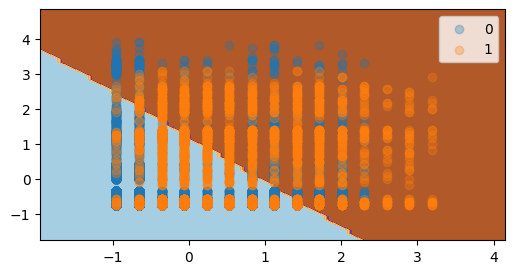

In [11]:
print('Logistic Regression bez regularyzacji')
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_none)
print('Logistic Regression z regularyzacją L1')
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l1)
print('Logistic Regression z regularyzacją L2')
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l2)
print('Logistic Regression z regularyzacją ElasticNet')
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_en)